In [59]:
# Initialize Otter
import otter
grader = otter.Notebook("ps3.ipynb")

# STATS 507 W22
## Problem Set 3
All functions will be tested by visible as well as hidden tests. The maximum amount of time any function is allowed to run is 10 seconds.

You may use any module in the [standard library](https://docs.python.org/3/library/) to solve these problems. You may not (yet) use other modules (scipy, numpy, pandas, etc.) that require installation. Here are a few modules that may prove particularly useful:

In [60]:
import collections
import string
import itertools
import math


### Question 1: Infinite sequences
For each of the problems below, write a function which generates the given infinite sequence. We should be able to use your generators to access any entry of the sequence no matter how deep. 

**1(a)** (2 pts) The prime numbers are

$$2, 3, 5, 7, 11, 13, 17, \dots$$

Give a generator for the primes. (Note: many algorithms exist for this problem. Yours should be efficient enough that we can use it to generate reasonably large prime numbers.)

In [61]:
def check_prime(num):
    for i in range(2, num):
        if num % i == 0:
            return False
    return True


def primes():
    i = 1
    while True:
        i = i+1
        if check_prime(i):
            yield i


In [62]:
grader.check("q1a")

q1a results: All test cases passed!

**1(b)** (3 pts) The *ruler sequence* is

$$1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7\dots$$

The first number (1) appears once; the next two numbers (2 and 3) appear twice, the next three numbers appear three times, etc.

In [63]:
def ruler():
    index = 0
    cycle = 1
    count = 0
    num = 1
    while True:
        index += 1

        count += 1

        yield num

        if count == cycle:
            count = 0
            num += 1

        if index == cycle**2:
            cycle = cycle + 1
            index = 0


# def ruler():
#     pass
#     i = 0
#     while True:
#         i = i+1
#         cycle = check_cycle(i)
#         # print('cycle', cycle)
#         # print('place within a cycle' ,i - sum([j**2 for j in range(cycle)]))
#         yield (i-1 - sum([j**2 for j in range(cycle)]))//cycle + (cycle-1)*cycle//2 + 1


# def check_cycle(num):
#     i = 0
#     while True:
#         # print('test sum', i, sum([j**2 for j in range(i)]))
#         if sum([j**2 for j in range(i)]) >= num:
#             # print('test i', i)
#             return i-1
#         i += 1


e = ruler()
for i in range(20):
    print(next(e))


1
2
2
3
3
4
4
4
5
5
5
6
6
6
7
7
7
7
8
8


In [64]:
grader.check("q1b")

q1b results: All test cases passed!

**1(c)** (3 pts) The look-and-say sequence  

$$1, 11, 21, 1211, 111221, 312211, 13112221, 1113213211, \dots$$

is generated as follows:

1. The first entry is one.
2. The second entry is generated by reading the first entry aloud: "one one"
3. The third entry is generated by reading the second entry aloud: "two ones"
4. The fourth entry is generated by reading the third entry aloud: "one two and one one"
5. The fifth entry is therefore "one one, one two, and two ones"

... and so forth. Note that each entry of the sequence should be a `str` object.


In [65]:
def look_say():
    nums = "1"
    while True:
        yield nums
        res = ""
        tmp = nums[0]
        count = 0
        for num in nums:
            if num == tmp:
                count += 1
            if num != tmp:
                res += str(count)
                res += str(tmp)
                tmp = num
                count = 1
        res += str(count)
        res += str(tmp)

        nums = res


e = look_say()
for i in range(10):
    print(next(e))


1
11
21
1211
111221
312211
13112221
1113213211
31131211131221
13211311123113112211


In [66]:
grader.check("q1c")

q1c results: All test cases passed!

**1(d)** (3 pts) July 2022 is a special month: it contains 5 Fridays, 5 Saturdays, and 5 Sundays. Write a generator that, starting with July, 2022, generates each successive special month (according to this definition) in order. The format of each generated entry should be a string of the form `"<month> <year>"`, for example `"July 2022"`, `"December 2845"`, etc. *Hint*: you may find the `calendar` module useful.

In [67]:
import calendar


def special_months():
    month = 7
    year = 2022
    # for month in range(1,13):
    while True:
        c = calendar.monthcalendar(year, month)
        count = [0, 0, 0]
        for week in c:
            for i, day in enumerate([calendar.FRIDAY, calendar.SATURDAY, calendar.SUNDAY]):
                if week[day] != 0:
                    count[i] += 1
                # print(week,week[day])
        # print(count)
        if count == [5, 5, 5]:
            yield "{} {}".format(calendar.month_name[month], year)

        month += 1
        if month == 13:
            month = 1
            year += 1
        # break


e = special_months()
for i in range(5):
    print(next(e))


July 2022
December 2023
March 2024
August 2025
May 2026


In [68]:
grader.check("q1d")

q1d results: All test cases passed!

**1(e)** (3 pts) A palindromic date is a date that reads the same forwards and backwards when written in standard `M-D-YY` format. This year, the palindromic dates are 2-2-22 and 2-20-22 through 2-28-22. (Dates with single-digit years are written with no leading zero, e.g. 1-1-1 for January 1, 2001). Starting with today, write a generator that returns all future palindromic dates:

```
>>> g = palindromic_dates()
>>> next(g)
"February 2, 2022"
>>> next(g)
"February 20, 2022"
...
>>> next(g)
"February 28, 2022"
>>> next(g)
"March 2, 2023"
```

In [69]:
day = 2
month = 2
year = 2022


def palindromic_dates():
    day = 2
    month = 2
    year = 2022
    while True:
        # Check if palindromic
        res = str(month).lstrip('0') + str(day).lstrip('0') + \
            str(year)[-2:].lstrip('0')
        # print(res)
        if res == res[::-1]:
            yield "{} {}, {}".format(calendar.month_name[month], day, year)
        # Count Num of day in a month
        day += 1
        if day > calendar.monthrange(year, month)[1]:
            day = 1
            month += 1
        if month == 13:
            month = 1
            year += 1

        # break
# print()
e = palindromic_dates()
for i in range(10):
    print(next(e))


February 2, 2022
February 20, 2022
February 21, 2022
February 22, 2022
February 23, 2022
February 24, 2022
February 25, 2022
February 26, 2022
February 27, 2022
February 28, 2022


In [70]:
grader.check("q1e")

q1e results: All test cases passed!

### Question 2: Simple ciphers

A *cipher* is an algorithm for encrypting or decrypting a text message, called *plaintext*, into *ciphertext*. In this exercise, we will assume that all plaintext to be encrypted or decrypted are composed of the lower-case Roman alphabet, without any punctuation or whitespace. Examples of such messages could be

```attackatdawn```

or 

```iamajellyfilleddonut```.

**2(a)** (4 pts) One of the oldest known ciphers is the [Caesar cipher](https://en.wikipedia.org/wiki/Caesar_cipher) or shift cipher, attributed to the Roman emperor. <img src="https://upload.wikimedia.org/wikipedia/commons/b/b4/Bust_of_Julius_Caesar_from_History_of_the_World_%281902%29.png" width=100 style="float: right; margin: 0 0 10px 10px;" /> The cipher works by shifting all letters of the alphabet by a pre-specified integer $k$. For example, if $k=+1$ then the plaintext

```thequickbrownfoxjumpsoverthelazydog```

encrypts to the ciphertext

```uifrvjdlcspxogpykvnqtpwfsuifmbazeph```

(Notice that in this example the letter `z` in `lazy` wrapped around to become an `a`.) 

Write two functions, `enc_caesar(s, k)` and `dec_caesar(s, k)` that respectively encrypt and decrypt the string `s` using the Caesar cipher, based on the integer key `k`.

In [71]:
def enc_caesar(s: str, k: int) -> str:
    '''
    Encrypt the message s using Ceasar cipher with key k.

    >>> enc_caeasar('thequickbrownfoxjumpsoverthelazydog', 1)
    'uifrvjdlcspxogpykvnqtpwfsuifmbazeph'
    '''
    return "".join([chr((ord(ss) + k - ord('a')) % 26 + ord('a')) for ss in s])


enc_caesar('thequickbrownfoxjumpsoverthelazydog', 1)


def dec_caesar(s: str, k: int) -> str:
    '''
    Decrypt the message s using Ceasar cypher with key k.

    >>> dec_caeasar('uifrvjdlcspxogpykvnqtpwfsuifmbazeph', 1)
    'thequickbrownfoxjumpsoverthelazydog'
    '''
    return "".join([chr((ord(ss) - k - ord('a')) % 26 + ord('a')) for ss in s])


In [72]:
grader.check("q2a")

q2a results: All test cases passed!

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9a/Vigenère_square_shading.svg" style="float: right; margin: 0 0 10px 10px" width=300 />


**2(b)** (4 pts) The Caesar ciphers are easily broken since the key can either be guessed, or is often widely available. A much more secure cipher is the [Vigenère cipher](https://en.wikipedia.org/wiki/Vigenère_cipher), which is keyed using a pre-specified word. The cipher works using a [tabula recta](https://en.wikipedia.org/wiki/Tabula_recta), a picture of which is shown to the right. 

Given a message `s` to be encrypted, the key `k` is repeated until it has the same length as `s`. Then each entry of the encrypted message `e` is obtained by looking up the corresponding **row** in `k`, and the correspending  **column** in `s`, in the tabula recta.

For example, suppose the message is `hello`, and the key is `sun`. We repeat the key until it has the same length as hello: `sunsu`. Then we encrypt the message by looking up the each entry in the table: `(s,h) (u,e) (n,l) (s,l) (u,o)`. The resulting string is `zyydi`.

In [73]:
# repeat the key to have the same length with the text
def rep(key, text):
    a, b = divmod(len(text), len(key))
    return key * a + key[:b]


def enc_vignere(s: str, k: str) -> str:
    "Encrypt s using Vignere cipher with key k"
    new_key = rep(k, s)
    # for kk,ss in zip(new_key,s):
    #     print(kk,ss)
    #     print(ord(kk),ord(ss))
    #     tmp = (ord(kk) + (ord(ss) - ord('a')) % 26 - ord('a'))%26 + ord('a')
    #     print(tmp, chr(tmp))
    return "".join([chr((ord(kk) + (ord(ss) - ord('a')) % 26 - ord('a')) % 26 + ord('a')) for kk, ss in zip(new_key, s)])


enc_vignere("hello", "sun")


def dec_vignere(s: str, k: str) -> str:
    "Decrypt s which was encrypted by Vignere cipher using key k"
    "s: cipher k: key"
    new_key = rep(k, s)
    # for kk,ss in zip(new_key,s):
    #     print(kk,ss)
    #     print(ord(kk),ord(ss))
    #     tmp = (ord(ss) - ord(kk)) % 26 + ord('a')
    #     print(tmp, chr(tmp))
    return "".join([chr((ord(ss) - ord(kk)) % 26 + ord('a')) for kk, ss in zip(new_key, s)])

enc_vignere('mfpcguckrfp', 'aaakcoipczf')

'mfpmiikzteu'

In [74]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

**2(c)** Suppose you are an attacker trying to decrypt a message by randomly guessing the key. What is your chance of guessing the key correctly on the first try if the message is encrypted using the Caesar cipher? What about for the Vignére cipher?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**2(d)** (3 pts) A [one-time pad](https://en.wikipedia.org/wiki/One-time_pad) (OTP) is a special type of Vignére cipher where the key is a randomly generated string equal in length to the message that is to be encoded. It can be mathematically proved that an OTP is crytographically perfect, in the sense that the enciphered message provides no information about the original message. Convince yourself of this fact by performing the following experiment:

1. Pick a message of your choosing to be encrypted. It should be not too short or too long (~20 characters).
2. Repeat a large number of times:
    - Generate a random string of the same length as the message. (Hint: the `random.choices` method may be useful here.)
    - Encrypt the message using this string as the key.
    - Save the resulting encrypted message for later analysis.

Now consider the first letter of each of the encrypted messages that you generated in step 2. This is a random variable that has a particular distribution, from which we have drawn a large number of samples. Estimate the distribution of this random variable using a histogram.  (You may find the counting functions you wrote for PS1 useful here.) What if I consider the joint distribution of the first two letters (or any pair of letters more generally)---what is their joint distribution? Suppose you are an attacker who wants to decrypt the encrypted message: do the results of these simulations suggest that this is feasible? Why or why not? 

_Type your answer here, replacing this text._

(array([0.15324706, 0.        , 0.        , 0.        , 0.15169412,
        0.        , 0.        , 0.        , 0.15437647, 0.        ,
        0.        , 0.        , 0.15383529, 0.        , 0.        ,
        0.        , 0.15280784, 0.        , 0.        , 0.        ,
        0.15358431, 0.        , 0.        , 0.        , 0.15192157,
        0.        , 0.        , 0.        , 0.15461176, 0.        ,
        0.        , 0.        , 0.15404706, 0.        , 0.        ,
        0.        , 0.15388235, 0.        , 0.        , 0.        ,
        0.15395294, 0.        , 0.        , 0.        , 0.15527843,
        0.        , 0.        , 0.        , 0.1538902 , 0.        ,
        0.        , 0.        , 0.15423529, 0.        , 0.        ,
        0.        , 0.15478431, 0.        , 0.        , 0.        ,
        0.15403922, 0.        , 0.        , 0.        , 0.15489412,
        0.        , 0.        , 0.        , 0.15322353, 0.        ,
        0.        , 0.        , 0.15367843, 0.  

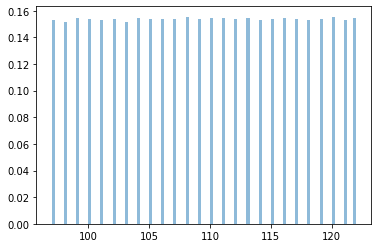

In [75]:
import random
import numpy as np
import matplotlib.pyplot as plt
message = "Hey! My name is Yuan Xiazi, I'll withdraw the class"
record = []
for i in range(10000):
    # print("".join(random.choices([chr(i+ord('a')) for i in range(26)], k = len(message))))
    s = random.choices([(i+ord('a')) for i in range(26)], k=len(message))
    # for c in s:
    #     if c in record:
    #         record[c] += 1
    #     else:
    #         record[c] = 1
    record += s
    # break

# x = np.arange(100)
# Start Drawing the Plot
plt.hist(record, alpha=0.5, bins=100, density=True, stacked=True)


<!-- END QUESTION -->

### Question 3: Book ciphers
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/King-James-Version-Bible-first-edition-title-page-1611.png" width=200 style="float: right; margin: 0 0 10px 10px" />

A [bible cipher](https://en.wikipedia.org/wiki/Book_cipher) uses the King James Bible (or some other widely available text) as the key. The cipher works by replacing each word in the message with a reference to a particular location in the Bible where that word occurs. 

The bible is organized hierarchically into *books*, *chapters*, and *verses*. For example, the first sentence in the King James Bible is 

>In the beginning God created the heaven and the earth. (Genesis 1:1)

This is the first sentence of the Book of Genesis, chapter 1, verse 1. In a bible cipher, an occurrence the word "beginning" in the plaintext message could be replaced by the tuple `(0,0,0,2)`, in reference to the third word of the first book, first chapter, and first verse of the Bible.

**3(a)** (3 pts) The file `kjv.txt` contains complete text of the King James Bible. 

Parse this file into a data structure `bible` 
such that calling `bible[book][chapter][verse][i]` returns the `i`th word of the corresponding book, chapter and verse. Here `book`, `chapter`, and `verse`, and `i` are integers representing the (0-indexed) position of corresponding word. You should convert all words to lowercase and remove anything that is not an alphabetic character or a space:

```
>>> bible[0][0][0]
['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth']
>>> bible[42][2][15]
['for', 'god', 'so', 'loved', 'the', 'world', 'that', 'he', 'gave', 'his', 'only', 'begotten', 'son']
```

In [76]:
bible_d = open('kjv.txt')
bible = []
book_id = -1
chap_id = -1
verse_id = -1
for line in bible_d.readlines():
    # Detect book
    line = line.lower()
    if line.startswith('##'):
        book_id += 1
        chap_id = -1
        verse_id = -1
        bible.append([])
    else:
        if line.startswith('['): # New Chap:Verse 
            tmp = line[1:line.find(']')]
            chap, verse = tmp.split(':')
            if int(chap)-1 != chap_id:
                bible[book_id].append([])
                chap_id += 1
                verse_id = -1
            if int(verse)-1 != verse_id:
                bible[book_id][chap_id].append([])
                verse_id += 1
            line = line[line.find(']')+1:]
        # Start Loading the Word
        line = line.strip()
        new_line = ""
        for w in line:
            if ord(w)>= ord('a') and ord(w)<=ord('z') or ord(w)>=ord('0') and ord(w)<=ord('9'):
                new_line+=w
            elif ord(w)==ord(' '):
                if new_line[-1] != ' ':
                    new_line+=w
        new_line = new_line.strip()
        if len(new_line)==0:
            continue
        else:
            words = new_line.strip().split(' ')
            # if '' in words:
            #     words.remove('')
            # words = words.remove('')
            bible[book_id][chap_id][verse_id] += words

In [77]:
grader.check("q3a")

q3a results: All test cases passed!

**3(b)** (3 pts) In order to encode quickly encode a message, we need to be able to efficiently map a given word to all of its location(s) in the bible. Create a second data structure `bible_inv` such that `bible_inv[word]` contains a list of all the locations where that word occurs in `bible`. Each location should be encoded as a 4-tuple of integers, such that the following identity holds:
```
for b, c, v, w in bible_inv[word]:
    assert bible[b][c][v][w] == word
```

In [78]:
bible_inv = {}
for b_id, book in enumerate(bible):
    for c_id, chap in enumerate(book):
        for v_id, verse in enumerate(chap):
            for w_id, word in enumerate(verse):
                if not word in bible_inv:
                    bible_inv[word] = [(b_id, c_id, v_id, w_id)]
                else:
                    bible_inv[word].append((b_id, c_id, v_id, w_id))
    # print(b_id, c_id)

In [79]:
for word in ['dawn', 'light', 'heaven']:
    for b, c, v, w in bible_inv[word]:
        assert bible[b][c][v][w] == word

In [80]:
grader.check("q3b")

q3b results: All test cases passed!

**3(c)** (3 pts) Finally, create the functions `enc_bible(s, bible_inv)` and `dec_bible(s, bible)` which encode and decode the string `s` given the mappings `bible` and `bible_inv` above. The output of `enc_bible` should be a string of hyphen-separated 4-tuples:

```
>>> m = enc_bible("the eagle flies at dawn", bible_inv)
>>> m
'5-20-42-7 25-16-2-9 18-77-44-5 25-23-17-10 39-27-0-10'
>>> dec_bible(m, bible)
"the eagle flies at dawn"
```

You may assume that any plaintext phrase `s` consists of entirely of unpunctuated lowercase words that exist in the bible.

**Note**: the output of `enc_bible` is not necessarily unique.

In [ ]:
def enc_bible(s, bible_inv):
    import random
    def tuple_to_key(tup):
        return "-".join(map(str, tup))
    return " ".join(tuple_to_key(random.choice(bible_inv[w])) for w in s.split(" "))

def dec_bible(s, bible):
    ret = []
    for word in s.split(" "):
        b, c, v, w = map(int, word.split("-"))
        ret.append(bible[b][c][v][w])
    return " ".join(ret)

In [ ]:
grader.check("q3c")

q3c results: All test cases passed!

**3(d)** (3 pts) One weakness of a book cipher is that it is not possible to encrypt a message containing words that are not found in the book. For example, I cannot encrypt the message `"i heart sushi"` using the bible cipher. Work around this limitation by creating a function `closest_encryptable(s, bible_inv)` which returns a copy of the plaintext `s` where each word in `s` that is not found in the bible has been replaced by its "nearest match" that *is* in the bible. 

```
>>> closest_encryptable("i heart sushi", bible_inv)
"i heart susi"
```

To measure the closeness between two words, we will use the function `difflib.SequenceMatcher`:

In [ ]:
from difflib import SequenceMatcher
print([SequenceMatcher(a="sushi", b=w).ratio() for w in ("shush", "pizza")])  # high vs low score

[0.8, 0.2]


In the event of a tie score, pick the word that comes first in alphabetical order. You can again assume that `s` is composed of unpunctuated lower-case words separated by spaces, as in the example.

In [ ]:
def closest_encryptable(s, bible_inv):
    res = []
    s = s.lower().strip()
    # bible_inv = sorted(bible_inv)
    keys = sorted(bible_inv.keys(), reverse=True)
    for ss in s.split(' '):
        if ss in keys:
            res.append(ss)
            continue
        score = [SequenceMatcher(a=ss, b=w).ratio() for w in keys]
        idx = score.index(max(score))
        # print(idx, list(bible_inv.keys())[idx]) # high vs low score
        res.append(keys[idx])
    return " ".join(res)
        
closest_encryptable("tiktok is so lit", bible_inv)
# tmp = sorted(bible_inv.keys())
# tmp   

'traitor is so lift'

In [ ]:
grader.check("q3d")

q3d results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4: A peculiar file format (5 pts)

The file `q4.dat` contains string data which has been encoded as follows:
- The first byte represents an unsigned integer $k_1$.
- The next $k_1$ bytes of the file represent $k_1$ ASCII characters of the message.
- The next character (the $k_1+1$-st) contains an unsigned integer $k_2$.
- The next $k_2$ bytes contain additional `data`. 
- ... and so on.

Decode the message.

Hints:
- `file.read(b)` reads `b` bytes from an open file `file`.
- To convert a byte to an integer, use the function `int.from_bytes()`. 
- To convert bytes to an ASCII string, use `bytes.decode('ascii')`.
- By printing out the result, it will be obvious if you have correctly decoded the message or not.

In [ ]:
with open('q4.dat', 'rb') as f:
    while True:
        byte = f.read(1)
        if not byte:
            break
        k1 = int.from_bytes(byte,'little')
        data = f.read(k1)
        data = data.decode('ascii')
        print(data, end='')



                   ,----,                    ,----,                          ,----,.                       ,----, 
                 ,/   .`|                  ,/   .`|                        ,'   ,' |                     .'   .`| 
  .--.--.      ,`   .'  : ,---,          ,`   .'  : .--.--.              ,'   .'   |    ,----..       .'   .'   ; 
 /  /    '.  ;    ;     /'  .' \       ;    ;     //  /    '.          ,----.'    .'   /   /   \    ,---, '    .' 
|  :  /`. /.'___,/    ,'/  ;    '.   .'___,/    ,'|  :  /`. /          |    |   .'    /   .     :   |   :     ./  
;  |  |--` |    :     |:  :       \  |    :     | ;  |  |--`           :    :  |--,  .   /   ;.  \  ;   | .'  /   
|  :  ;_   ;    |.';  ;:  |   /\   \ ;    |.';  ; |  :  ;_             :    |  ;.' \.   ;   /  ` ;  `---' /  ;    
 \  \    `.`----'  |  ||  :  ' ;.   :`----'  |  |  \  \    `.          |    |      |;   |  ; \ ; |    /  ;  /     
  `----.   \   '   :  ;|  |  ;/  \   \   '   :  ;   `----.   \         `----'.'

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question -1 (extra credit; +5)

The file `secret.txt` included with this problem set contains an encrypted message. Can you decode it?

**Rules**: 

- In order to get credit, you must document every step that you used to arrive at the solution. Submissions without a plausible explanation of how the solution was derived will receive no points, regardless of correctness.
- You may collaborate with others _on this question only_. Your solution should list the name(s) of the your collaborators. Each collaborator will receive $5/(\text{num. collaborators})$ points in the event of a correct answer.
- You may not discuss this problem with anyone except your collaborators.

_Type your answer here, replacing this text._

In [ ]:
words = [chr(ord(a)+1), ]

NameError: name 'a' is not defined

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

q1a results: All test cases passed!

q1b results: All test cases passed!

q1c results: All test cases passed!

q1d results: All test cases passed!

q1e results: All test cases passed!

q2a results: All test cases passed!

q2b results: All test cases passed!

q3a results: All test cases passed!

q3b results: All test cases passed!

q3c results: All test cases passed!

q3d results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload this .zip file to Gradescope for grading.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)